In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


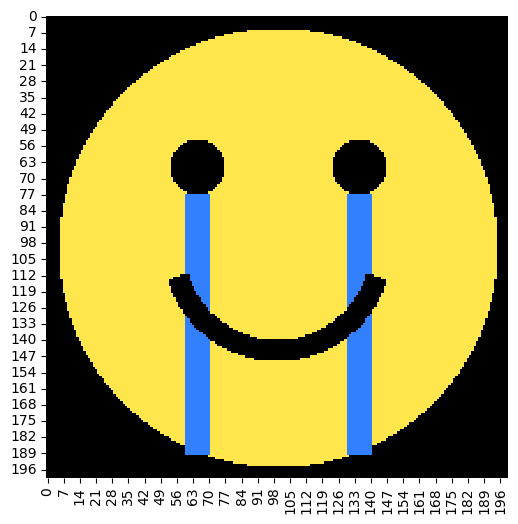

In [8]:
size = 200
Z = np.zeros((size, size, 3))   # RGB image

# Colors
FACE = np.array([1.0, 0.9, 0.3])   # yellow face
TEAR = np.array([0.2, 0.5, 1.0])   # bright blue tears
BLACK = np.array([0, 0, 0])        # features

cx, cy = size // 2, size // 2

# FACE CIRCLE
for i in range(size):
    for j in range(size):
        if (i - cx)**2 + (j - cy)**2 < (size // 2.1)**2:
            Z[i, j] = FACE


eye_r = 12
left_eye_cx, left_eye_cy = cx - 35, cy - 35
right_eye_cx, right_eye_cy = cx - 35, cy + 35

for i in range(size):
    for j in range(size):
        # left eye
        if (i - left_eye_cx)**2 + (j - left_eye_cy)**2 < eye_r**2:
            Z[i, j] = BLACK
        # right eye
        if (i - right_eye_cx)**2 + (j - right_eye_cy)**2 < eye_r**2:
            Z[i, j] = BLACK

# TEARS (start just below the eyes, centered under each eye)
left_tear_start = left_eye_cx + eye_r
right_tear_start = right_eye_cx + eye_r
for x in range(left_tear_start, size - 10):
    for offset in range(-5, 6):
        Z[x, left_eye_cy + offset] = TEAR
for x in range(right_tear_start, size - 10):
    for offset in range(-5, 6):
        Z[x, right_eye_cy + offset] = TEAR

#  MOUTH
for theta in np.linspace(0.3, np.pi - 0.3, 500):
    for r_offset in range(-4, 5):
        r = 45 + r_offset
        x = int(cx + r * np.sin(theta))
        y = int(cy + r * np.cos(theta))
        if 0 <= x < size and 0 <= y < size:
            Z[x, y] = BLACK

# Convert RGB → label matrix
Z_labels = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        if np.array_equal(Z[i, j], FACE):
            Z_labels[i, j] = 1
        elif np.array_equal(Z[i, j], TEAR):
            Z_labels[i, j] = 2
        elif np.array_equal(Z[i, j], BLACK):
            Z_labels[i, j] = 3
        else:
            Z_labels[i, j] = 0

# Colormap
cmap = ListedColormap([
    (1,1,1),
    FACE,
    TEAR,
    BLACK
])

# Heatmap Render
plt.figure(figsize=(6, 6))
sns.heatmap(
    Z_labels,
    cmap=cmap,
    cbar=False,
    square=True,
    vmin=0,      # FORCE discrete mapping
    vmax=3       # FORCE discrete mapping
)
plt.show()
